<a href="https://colab.research.google.com/github/Gaikwadpawan3006/Prediction-using-Unsupervised-ML-On-Iris-dataset/blob/main/Prediction_using_Unsupervised_ML_on_Iris_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spark Foundation Internship**

**Author : Pawan Ramesh Gaikwad**

 **Task 2: Prediction using Unsupervised ML (Level: Begineer)** 

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

**Load Dataset**

In [ ]:
## Load dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [23]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [24]:
iris_df.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [25]:
iris_df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [26]:
iris_df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

**finding the optimize number of cluster for k-means classification**

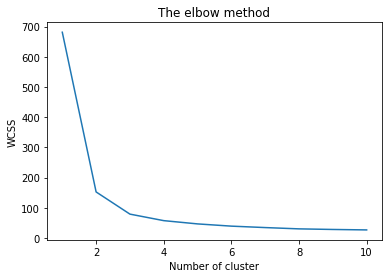

In [9]:
x = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++', 
                  max_iter = 300, n_init =10,random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()


**Applying Kmeans on Dataset**

In [10]:
##applying kmeans on dataset
kmeans = KMeans(n_clusters = 3,init = 'k-means++', 
                  max_iter = 300, n_init =10,random_state = 0)
y_means = kmeans.fit_predict(x)

**Visualize on Cluster**

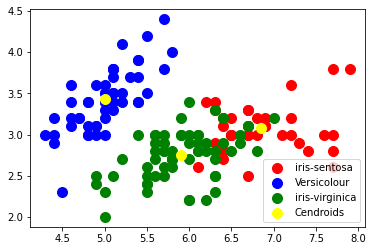

In [12]:
plt.scatter(x[y_means ==0,0], x[y_means == 0,1],
            s = 100, c = 'red',label= 'iris-sentosa')
plt.scatter(x[y_means ==1,0], x[y_means == 1,1],
            s = 100, c = 'blue',label= 'Versicolour')
plt.scatter(x[y_means ==2,0], x[y_means == 2,1],
            s = 100, c = 'green',label= 'iris-virginica')

#ploting on cendroid of cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow',label= 'Cendroids')
plt.legend()